# Big Data projekt - Kéki Bálint

"Data 12" dataset

## Adatkészlet

Ez az adathalmaz különböző amerikai felsőoktatási intézmények jellemzőit tartalmazza.

Az adatok célja, hogy megértsük, milyen tényezők befolyásolják a hallgatók jövedelmét, intézmény típusát, illetve hogy csoportosíthatók-e az egyetemek bizonyos jellemzők alapján.

## Attribútumok ismertetése

**School**:	Az intézmény neve

**Public**:	Bináris változó: 
> **1** = állami
>
> **0** = magán

**Town/State**:	Az egyetem földrajzi elhelyezkedése: város / állam

**Earn**: Az egyetem volt hallgatóinak átlagos éves jövedelme 5 évvel a diploma megszerzése után (USD)

**Price**: Az intézmény éves tandíja támogatás nélkül (USD)

**Price_with_aid**: Az intézmény tényleges átlagos költsége egy hallgatónak, figyelembe véve a támogatásokat (USD)

**SAT**: A felvételt nyert hallgatók átlagos SAT pontszáma

**ACT**: A felvételt nyert hallgatók átlagos ACT pontszáma

**need_fraction**: Azon hallgatók aránya, akik szociális alapon támogatást kapnak

**merit_aided**: Azon hallgatók aránya, akik tanulmányi érdemalapú ösztöndíjban részesülnek


## Mi az SAT (Scholastic Assessment Test)?

A SAT az Egyesült Államokban alkalmazott standardizált felvételi teszt, amelyet a középiskolás diákok teljesítenek az egyetemre való jelentkezés során.

>Pontszám tartomány: 400 – 1600
>
>800 pont = átlagos teljesítmény
>
>1200–1400+ pont = kiemelkedő eredmény

A SAT pontszám az egyetemek számára egy objektív mérőszám a jelentkezők tudásszintjéről.

## Mi az ACT (American College Testing)?

Az ACT egy másik széles körben elfogadott felvételi teszt.

> Pontszám tartomány: 1 – 36
>
>A magasabb érték jobb teljesítményt jelez

Több részterületre fókuszál.

 ## Szükséges Python könyvtárak importálása

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sklearn


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, classification_report, confusion_matrix, accuracy_score, f1_score

sns.set(style="whitegrid")


## Adatok betöltése és szerkezeti áttekintése

In [2]:

df = pd.read_csv("data_12.csv")
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706 entries, 0 to 705
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   School          706 non-null    object 
 1   Public          706 non-null    int64  
 2   Town            706 non-null    object 
 3   State           706 non-null    object 
 4   Earn            706 non-null    int64  
 5   SAT             706 non-null    int64  
 6   ACT             706 non-null    int64  
 7   Price           706 non-null    int64  
 8   Price_with_aid  706 non-null    int64  
 9   need_fraction   687 non-null    float64
 10  merit_aided     645 non-null    float64
dtypes: float64(2), int64(6), object(3)
memory usage: 60.8+ KB
None


## Leíró statisztikák

In [3]:
print(df.describe())

           Public          Earn          SAT         ACT         Price  \
count  706.000000    706.000000   706.000000  706.000000    706.000000   
mean     0.379603  45597.696884  1141.777620   24.981586  42199.787535   
std      0.485632   6723.932021   136.571983    3.451130  15726.765028   
min      0.000000  28300.000000   810.000000   15.000000  16500.000000   
25%      0.000000  41100.000000  1040.000000   23.000000  25900.000000   
50%      0.000000  44750.000000  1120.000000   25.000000  44000.000000   
75%      1.000000  48900.000000  1220.000000   27.000000  55500.000000   
max      1.000000  79700.000000  1550.000000   34.000000  70400.000000   

       Price_with_aid  need_fraction  merit_aided  
count      706.000000     687.000000   645.000000  
mean     23491.359773       0.572242     0.156667  
std       8270.413584       0.171056     0.106342  
min       2200.000000       0.070000     0.010000  
25%      16900.000000       0.440000     0.070000  
50%      23100.000000

## Adattisztítás és előfeldolgozás

 ### Hiányzó értékek kezelése

In [4]:
for col in ['SAT', 'ACT', 'Earn', 'Price', 'Price_with_aid', 'need_fraction', 'merit_aided']:
    df[col] = df[col].fillna(df[col].median())

### Duplikált sorok eltávolítása

In [5]:
df.drop_duplicates(inplace=True)

### Változók típusának egységesítése

In [6]:

df['Public'] = df['Public'].astype(int)


# SAT pontszámok eloszlása

Megvizsgáljuk az egyetemek által elfogadott diákok átlagos SAT pontszámainak eloszlását.

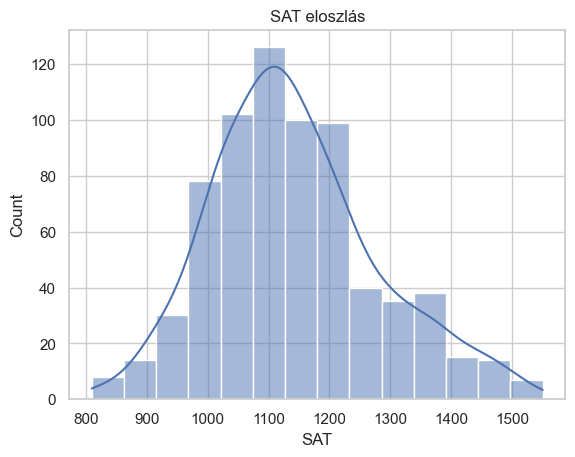

In [7]:
sns.histplot(df['SAT'], bins=14, kde=True)
plt.title("SAT eloszlás")
plt.show()

### Változók:
>- x tengely: SAT elért pontszámok
>- y tengely: az adott pontszámtartományba eső tanulók száma

### Megfigyelések:
> Az adatok közel normális eloszlást mutatnak, enyhén jobbra ferdül.
> 
> A legtöbb hallgató SAT pontszáma 1050 és 1150 között található.
>
> A csúcs a 1100-as pontszámnál található.
>
### Következtetések:
> Az amerikai felsőoktatás túlnyomó része közepesen szelektív.
> 
> Az elit intézmények kisebb hányadot képviselnek.
>
> Kevés intézményhez tartozik kimagasló SAT pontszám.
>
> Az adatok többsége a középmezőnyhöz tartozik.

# Boxplot elemzés

Boxplot segítségével megvizsgáljuk hogy az egyetem típusa hatással van-e a diplomát követő átlagos jövedelemre. 

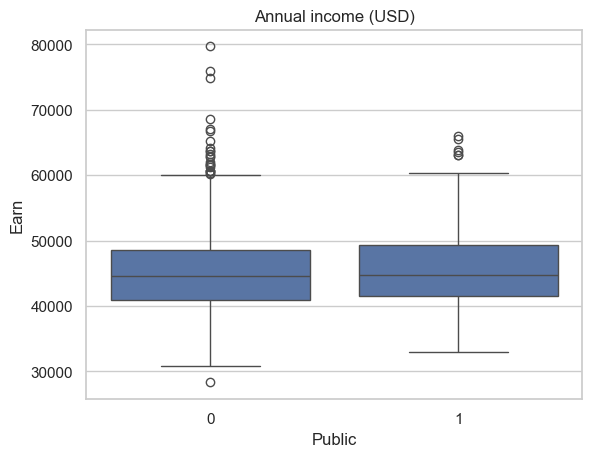

In [8]:

sns.boxplot(x='Public', y='Earn', data=df)
plt.title("Annual income (USD)")
plt.show()


### Változók:
* x tengely:

> **0**: magánintézmény (private)
>
>**1**: állami intézmény (public)

* y tengely: a hallgatók átlagos keresete a diploma megszerzése után

### Megfigyelések: 
>  A medián jövedelmek nagyon hasonlóak
> 
> A jövedelmek eloszlása is hasonló
> 
> A magánintézményekből végzettek többen érnek el extrém magas jövedelmet
> 
> Az alsó jövedelmi határ hasonló vagy kissé alacsonyabb magánintézményeknél

### Következtetések:
>Egyetem típusa nem döntő tényező a tipikus keresetben.
>
>Néhány magánintézmény kiemelkedő karrierlehetőséget kínál.
>
>A Jövedelemeloszlás stabil mindkét típusnál.

# Scatter Plot Elemzés

Megvizsgáljuk, van-e összefüggés a hallgatók SAT pontszáma és a diploma utáni átlagos éves jövedelmük között,

valamint,

hogy ezek a kapcsolatok eltérnek-e az állami és a magánintézmények között.

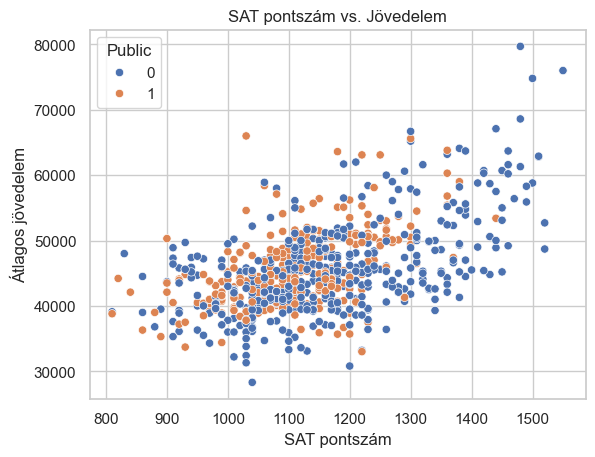

In [12]:

sns.scatterplot(x='SAT', y='Earn', hue='Public', data=df)
plt.title("SAT pontszám vs. Jövedelem")
plt.xlabel("SAT pontszám")
plt.ylabel("Átlagos jövedelem")
plt.show()


### Változók: 
> x tengely: SAT pontszám 
>
> y tengely: A hallgatók éves szinti átlagos jövedelme 5 évvel a diploma megszerzése után (USD)
> 
>🔵 Magánintézmények hallgatói (Public = 0)
>
>🟠 Állami intézmények hallgatói (Private = 1)

### Megfigyelések:
   > Mind az állami, mind a magánintézmények hallgatói hasonló SAT – jövedelem mintát mutatnak.
   > 
   > A kiugróan magas jövedelmek többnyire magánintézményekhez kötődnek.
   > 
   > Az átlagos SAT tartományban és jövedelmi szinten mindkét csoport hasonló sűrűséggel jelenik meg.

### Következtetések:
   > Általánosságban elmondható, hogy magasabb SAT pontszámhoz magasabb jövedelem társul.

# Korrelációs mátrix

A korrelációs mátrix segítségével megvizsgáljuk, hogy az egyetemek különböző numerikus jellemzői milyen lineáris kapcsolatban állnak egymással.

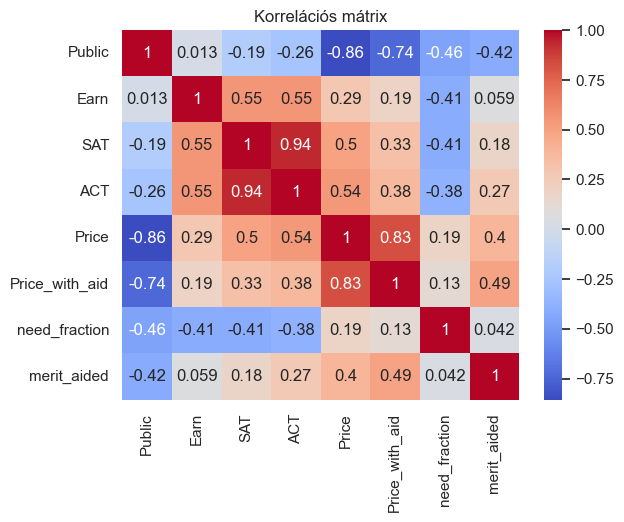

In [8]:

sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Korrelációs mátrix")
plt.show()


> **+1**: teljes pozitív lineáris kapcsolat,
>
>  **0**: nincs lineáris kapcsolat,
>
> **–1**: teljes negatív lineáris kapcsolat.
### Megfigyelések:
#### 1. Állami vs. magánintézmény
   > Price **(−0.86)** és Price_with_aid **(−0.74)**: Erős negatív korreláció. Az állami egyetemek jóval olcsóbbak, mind teljes árban, mind támogatással.
   >
   > Earn **(0.013)**: Nincs lényegi korreláció a végzést követő jövedelemmel.
   > 
   > SAT **(−0.19)** és ACT **(−0.26)**: Gyenge negatív kapcsolat. Magánegyetemeken általában magasabbak a pontszámok.
#### 2. Jövedelem 5 év után
   >SAT **(0.55)** és ACT **(0.55)**: Közepes pozitív korreláció. A magasabb felvételi pontszámokkal rendelkező egyetemek végzősei jobban keresnek.
   >
   >Price **(0.29)** és Price_with_aid **(0.19)**: Enyhe pozitív kapcsolat. A drágább egyetemek végzősei kissé többet keresnek, de nem erőteljes hatás.
   >
   >need_fraction **(−0.41)**: Negatív kapcsolat. Ahol több a rászoruló hallgató, az átlagjövedelem alacsonyabb.

#### 3. Árak
   > Price - Price_with_aid **(0.83)**: Erős korreláció. A támogatás mértéke ugyanarra az alaptandíjra épül.
   >
   > Price - merit_aided **(0.40)**: Mérsékelt pozitív kapcsolat. A drágább iskolák gyakrabban nyújtanak ösztöndíjat.
   >
   > Price - need_fraction **(0.19)**: Gyenge kapcsolat. Az ár kevéssé függ attól, hogy hányan kapnak szükségalapú támogatást.

#### 4. Támogatások
   > merit_aided - Price_with_aid **(0.49)**: Pozitív kapcsolat van a támogatott ár és ösztöndíjak között.
   >
   > merit_aided - need_fraction **(0.042)**: Nagyon gyenge kapcsolat. az érdem, és szükségalapú támogatás nem feltétlen ugyanazokat a hallgatókat célozza.

### Következtetések:
> A drágább, magánintézmények általában jobb felvételi pontszámú diákokat vonzanak, több ösztöndíjat kínálnak, és magasabb jövedelmű végzőseik vannak.
>
> Az állami egyetemek olcsóbbak, de kevésbé szelektívek.
>
> A jövedelem jobban összefügg az akadémiai felkészültséggel, mint az árakkal vagy támogatásokkal.










## Bar Chart

A bar chart segítségével meghatározzuk, mely amerikai felsőoktatási intézmények nyújtják a legjobb ár-érték arányt a hallgatók számára.

#### Az ár-érték arányt a következő képlettel számoltuk:
> Ez az arány azt mutatja meg, hogy 1 dollár befizetett támogatott árért mennyi várható jövedelmet kap a hallgató.

In [ ]:
df['value_ratio'] = df['Earn'] / df['Price_with_aid']

#### Adatok kiválasztása, rendezése, és az ábra létrehozása

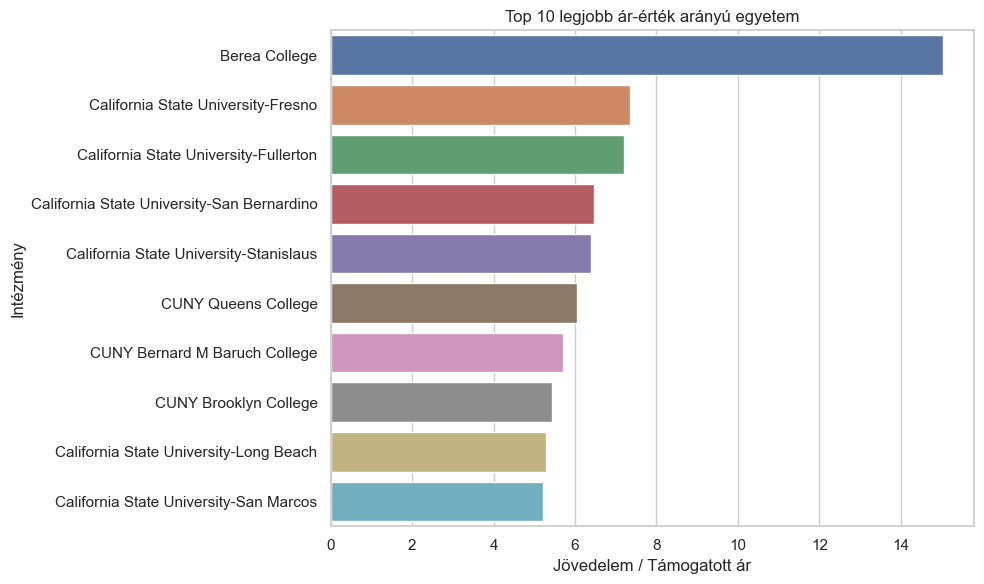

In [68]:


top_value = df[['School', 'Earn', 'Price_with_aid', 'value_ratio']].sort_values(by='value_ratio', ascending=False).head(10)


plt.figure(figsize=(10, 6))
sns.barplot(data=top_value, y='School', x='value_ratio', hue='School', legend = False)
plt.xlabel("Jövedelem / Támogatott ár")
plt.ylabel("Intézmény")
plt.title("Top 10 legjobb ár-érték arányú egyetem")
plt.tight_layout()
plt.show()


### Megfigyelések: 
>Berea College kiemelkedik a mezőnyből, több mint 14-szeres megtérülést kínál, messze maga mögött hagyva a többi intézményt.
>
> A többi egyetem, mint például a California State University különböző campusai és a CUNY hálózat is jól teljesítenek, 5–6-szoros értékarányt mutatva.
>
> A listán főleg állami vagy államilag támogatott intézmények szerepelnek, amelyek olcsóbb képzést kínálnak, de a végzést követően versenyképes jövedelemmel lehet számolni.

### Következtetések:
>Az ár-érték arány alapján nem feltétlenül a leghíresebb vagy legdrágább egyetemek nyújtják a legjobb megtérülést.
>
> Érdemes figyelembe venni az egyetem támogatott árát és a várható jövedelmet, azok számára akik költséghatékony, de hosszú távon jövedelmező döntést akarnak hozni.

# K-Közép Klaszterezés 

 A felsőoktatási intézményeket jellemző attribútumok alapján homogén csoportokra bontjuk.
 
 Ezzel felfedezhetjük, hogy milyen típusú egyetemek jellemzők az adathalmazon belül.

 #### Kiválasztjuk az elemzéshez használt jellemzőket az adathalmazból:

>**(SAT, ACT)**: Ezek a jellemzők meghatározzák az intézmény akadémiai szintjét,
>
>**(Price, aid)**: pénzügyi hozzáférhetőségét,
>
>**(Earn)** : várható átlagos jövedelmét.
>
>Nincs célváltozó

In [10]:
features = ['SAT', 'ACT', 'Earn', 'Price', 'Price_with_aid', 'need_fraction', 'merit_aided']
x = df[features]

> Hiányzó értékeket a megfelelő oszlop mediánjával helyettesítünk.

In [11]:
x = x.fillna(x.median())

 > Adatok standardizálása.

In [12]:
x_scaled = StandardScaler().fit_transform(x)

> Dimenziócsökkentés PCA-val, 2 dimenzióra szűkítjük az adatokat.

In [13]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)

> KMeans klaszterezési modell-t hozunk létre 3 klaszterrel.

In [42]:
kmeans = KMeans(n_clusters=3, random_state=0)

> KMeans modellt alkalmazzuk a standardizált adatokra, és elmentjük a hozzárendelt klasztercímkéket.

In [43]:

kmeans_labels = kmeans.fit_predict(x_scaled)


> A főkomponensekre csökkentett 2D adatokat ábrázoljuk scatter plot formájában, a klasztercímkék szerint színezve.

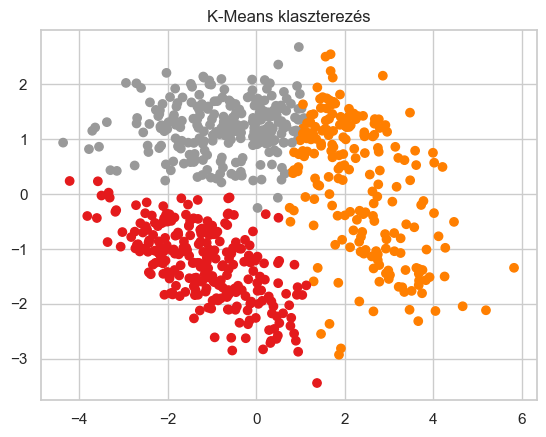

In [44]:
plt.scatter(x_pca[:,0], x_pca[:,1], c=kmeans_labels, cmap='Set1')
plt.title("K-Means klaszterezés")
plt.show()

### Megfigyelések: 
> 1. Klaszter 🔴 (alacsonyabb árú egyetemek, sok támogatással)
>
> 2. Klaszter 🔘 (középkategóriás egyetemek)
>
> 3. Klaszter 🟠 (elit, drága egyetemek)

### Következtetések:
>A K-Means klaszterezés sikeresen csoportosította az intézményeket profil alapján.
>
>A csoportok jól értelmezhetők: ár, támogatás, felvételi szint és várható kereset mentén különülnek el.
>
#### Az eredmények hasznosak lehetnek:
>
>Ösztöndíj program kialakítására
>
>Intézményi összehasonlításra

# DBSCAN klaszterezés 

A DBSCAN algoritmus segítségével azonosítjuk a természetes klasztereket az egyetemek jellemzői alapján, illetve feltárjuk azokat az intézményeket, amelyek kilógnak a megszokott mintázatból.

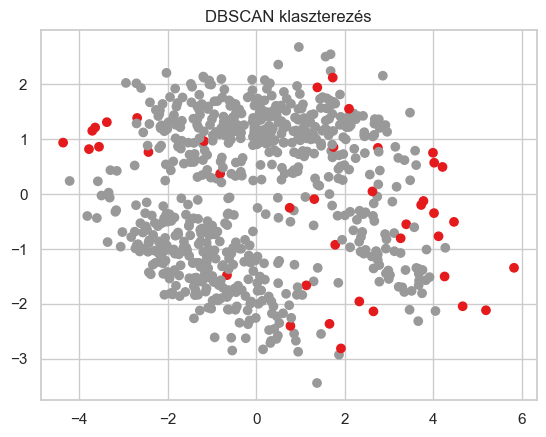

In [17]:

dbscan = DBSCAN(eps=1.5, min_samples= 20)
dbscan_labels = dbscan.fit_predict(x_scaled)

plt.scatter(x_pca[:,0], x_pca[:,1], c=dbscan_labels, cmap='Set1')
plt.title("DBSCAN klaszterezés")
plt.show()


### Megfigyelések:

> 🔘 Pontok egyetlen klasztert alkotnak.
>
> 🔴 Pontok azok az adatok, amelyeket a DBSCAN outliernek (zajnak) tekint, nem tartoznak egyetlen klaszterhez sem.

### Következtetés:
> Az adatok nagy része viszonylag sűrű csoportosulást mutat.
> 
> Néhány adatpont kilóg a mintából. Ezek lehetnek extrém értékek vagy eltérő jellemzőkkel rendelkező intézmények. ( pl. nagyon drága vagy olcsó, nagyon magas vagy alacsony SAT/ACT pontszám).



# Lineáris regresszió 

Milyen mértékben lehet a végzettek átlagjövedelmét megjósolni az intézmény jellemzői alapján?

 #### Bemeneti változók és célváltozó definiálása, indoklása

> **SAT, ACT**: A felvételi pontszámok tükrözhetik a hallgatók képességeit.
>
> **Price, Price_with_aid**: A tandíj szintje hatással lehet az intézmény minőségére és hosszú távú karrierkilátásokra.
>
> **need_fraction, merit_aided**: A támogatási arányok jelezhetik az intézmény elérhetőségét és ösztönző rendszereit.

In [69]:

x_reg = df[['SAT', 'ACT', 'Price', 'Price_with_aid', 'need_fraction', 'merit_aided']]
y_reg = df['Earn']


> Adat felosztás tanító és teszt adathalmazra

In [70]:

x_train, x_test, y_train, y_test = train_test_split(x_reg, y_reg, test_size=0.2, random_state=42)


> Lineáris regresszió létrehozása és betanítása, előrejelzés a teszt halmazon

In [71]:

model1 = LinearRegression()
model1.fit(x_train, y_train)
y_pred1 = model1.predict(x_test)

print("Linear R2:", r2_score(y_test, y_pred1))


Linear R2: 0.35412966137329127


> R² = 0.354: Az attribútumok a célváltozó varianciájának kb. 35%-át magyarázzák.
>
>Ez mérsékelt magyarázóerőre utal.

### Következtetések: 
>A hallgatói kereset részben megjósolható a felvételi pontszámok és intézményi költségek alapján.
>
>Egyszerűen értelmezhető, de nem fog megragadni bonyolultabb összefüggéseket.

#### Random Forest osztályozási modell

RF osztályozási modell-t alkalmazunk annak megállapítására, hogy egy intézmény végzett hallgatóinak jövedelme a teljes minta mediánértéke felett van-e vagy sem.

In [72]:

model2 = RandomForestClassifier()
model2.fit(x_train, y_train > y_reg.median())
y_pred2 = model2.predict(x_test)
print("RandomForest Classification accuracy:", accuracy_score(y_test > y_reg.median(), y_pred2))


RandomForest Classification accuracy: 0.6619718309859155


> A modell a tesztminták 68%-ában helyesen osztályozza be az egyetemeket aszerint, hogy a végzett hallgatók keresete magasabb-e a mediánnál

# Logisztikus Regresszió

Logisztikus regressziót alkalmazunk annak osztályozására, hogy egy adott egyetem állami (1) vagy magán (0) intézmény-e, különböző jellemzők alapján, amelyre több modellt is kipróbálunk és összehasonlítunk.



#### Bemeneti változók és célváltozó definiálása, indoklása:
> 
> **SAT** és **ACT**: A felvételi követelmények szintjét mutatják, a magánegyetemek jellemzően eltérő pontokat várnak.
>
>**Price**: A tandíj gyakran magasabb a magánintézményeknél.
>
>**need_fraction**: a rászoruló hallgatók aránya különbözhet intézménytípusonként.



In [73]:
x_cls = df[['SAT', 'ACT', 'Price', 'need_fraction']]
y_cls = df['Public']

#### Adat felosztás tanító és teszt adathalmazra
>
> A modell értékeléséhez az adatok 80%-át tanítjuk, 20%-át tesztelésre tartjuk fenn.

In [74]:
x_train, x_test, y_train, y_test = train_test_split(x_cls, y_cls, test_size=0.2, random_state=42)

#### Logisztikus regresszió modell

In [75]:
logreg = LogisticRegression(max_iter = 1000)
logreg.fit(x_train, y_train)
y_pred_log = logreg.predict(x_test)
print("LogReg Accuracy:", accuracy_score(y_test, y_pred_log))

LogReg Accuracy: 0.9859154929577465


#### KNN algoritmus

In [76]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))

KNN Accuracy: 0.971830985915493


#### Random Forest osztályozási modell

In [77]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
print("RandomForest Accuracy:", accuracy_score(y_test, y_pred_rf))

RandomForest Accuracy: 0.9788732394366197


#### Confusion Matrix

In [78]:
print("Confusion Matrix (RF):\n", confusion_matrix(y_test, y_pred_rf))
print("F1 Score (RF):", f1_score(y_test, y_pred_rf))
print("Classification Report (RF):\n", classification_report(y_test, y_pred_rf))

Confusion Matrix (RF):
 [[85  2]
 [ 1 54]]
F1 Score (RF): 0.972972972972973
Classification Report (RF):
               precision    recall  f1-score   support

           0       0.99      0.98      0.98        87
           1       0.96      0.98      0.97        55

    accuracy                           0.98       142
   macro avg       0.98      0.98      0.98       142
weighted avg       0.98      0.98      0.98       142



#### Összegzés:
>**Precision (0)**: A magán intézményként besorolt egyetemek 99%-a valóban magán.
>
>**Recall (1)**: Az állami egyetemeket 98%-os pontossággal felismeri a modell.
>
>**Általános pontosság (F1 score)**: 98%, tehát kiváló teljesítmény.